In [22]:
# Load packages
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
path = 'C:/Users/angel/Documents/Economics/Research/Banking Project/data/intermediate/call_reports_SP/'

# Set path to be the directory:
os.chdir(path)

In [24]:
#df = pd.concat([pd.read_csv(f) for f in os.listdir() if f.endswith('.csv')])
#df = df.iloc[:, 0:270]
#df['Date'] = df['Date'].astype(str)
#df['Month'] = np.where(df['Date'].str.len() == 8, df['Date'].str[0:2], '0'+df['Date'].str[0])
#df['Day'] = df['Date'].str[-6:-4]
#df['Year'] = df['Date'].str[-4:]
#df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'] + '-' + df['Day'])
#df.to_csv(path + 'call_reports.csv', index = False)

# list of var_names:
#list = ['RIADA517', 'RIADA518', 'RIAD4508', 'RIAD0093', 'RIADHK03', 'RIADHK04', 'RCON6636']

# create a subset of df with only the var_names in the list:
#df2 = df[df['var_name'].isin(list)]
#df2.to_csv('C:/Users/angel/Documents/Economics/Research/Banking Project/data/intermediate/call_reports/call_reports.csv', index = False)

In [25]:
# Read file that contains only the variables of interest, specify that the column 'Date' is a date:
df = pd.read_csv('call_reports.csv', parse_dates = ['Date'])

C:\Users\angel\AppData\Local\Temp\ipykernel_268\1849562282.py:2: DtypeWarning: Columns (102,146,187,228) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('call_reports.csv', parse_dates = ['Date'])


### Deposits

In [26]:
# Create a new column that will contain the deposit expenditure it will sum 'RIADA517', 'RIADA518', 'RIAD4508', 'RIAD0093' for
# any date before 2017:
df['Deposit Expenditure'] = np.where(df['Date'] < '2017-01-01', df['RIADA517']+df['RIADA518']+df['RIAD4508']+df['RIAD0093'], 
                                     df['RIADHK03']+df['RIADHK04']+df['RIAD4508']+df['RIAD0093'])

In [27]:
df['Total Deposit'] = np.where(df['Date'] < '2017-01-01', df['RCON3485']+df['RCONB563']+df['RCONA514']+df['RCONA529'], 
                                     df['RCON3485']+df['RCONB563']+df['RCONHK16']+df['RCONHK17'])

In [28]:
df['Deposit Rate'] = df['Deposit Expenditure'] / df['Total Deposit']

### Deposits

In [29]:
# Keep the columns that are of interest:
df2 = df[(df['Deposit Expenditure']>0) & (df['Total Deposit']>0)]
# Until here, dataset matches with Lucas.
#df2[(df2['Date']>'2023-01-01') & (df2['Date']<'2024-01-01')]['Deposit Rate'].describe()

In [30]:
# Trim the 'Deposit Rate' from df2 on the 1st and 99th percentiles, per year:
df3 = df2.groupby('Date').apply(lambda x: x[(x['Deposit Rate'] >= x['Deposit Rate'].quantile(0.01)) & 
                                            (x['Deposit Rate'] <= x['Deposit Rate'].quantile(0.99))]).reset_index(drop=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_268\1328853274.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df3 = df2.groupby('Date').apply(lambda x: x[(x['Deposit Rate'] >= x['Deposit Rate'].quantile(0.01)) &


In [31]:
# Dataset matches with Lucas until here.
#df3[(df3['Date']>'2023-01-01') & (df3['Date']<'2024-01-01')]['Deposit Rate'].describe()

In [32]:
# Create an extra column in df3 with the avg. deposit rate per Date:
df3['Avg. Deposit Rate'] = df3.groupby('Date')['Deposit Rate'].transform('mean')
df3['Std. Deposit Rate'] = df3.groupby('Date')['Deposit Rate'].transform('std')

In [33]:
df3['R_hat'] = (df3['Deposit Rate'] - df3['Avg. Deposit Rate']) / df3['Std. Deposit Rate']

#### Check the plots with Jason 

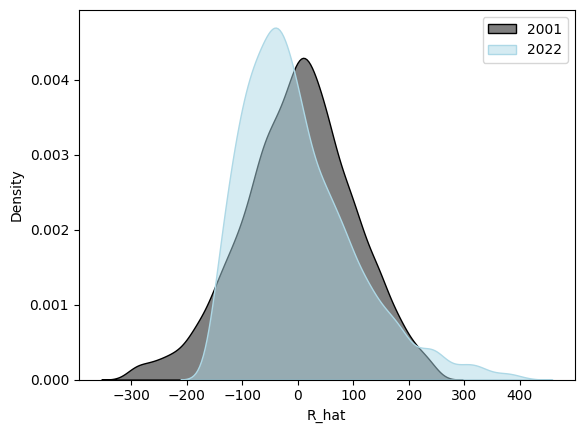

In [34]:
# plot the kernel distribution of the deposit rates for the above dates:
sns.kdeplot(df3[df3['Date']=='2001-03-31']['R_hat']*100, label='2001', color='black', fill=True, alpha=0.5)
sns.kdeplot(df3[df3['Date']=='2022-03-31']['R_hat']*100, label='2022', color='lightblue', fill=True, alpha=0.5)
plt.legend()
plt.show()

### Loans and Assets

In [35]:
# Check total Interest Income:
df['Interest Income'] = df['RIAD4107']
# Check Total Assets:
df['Total Assets'] = df['RCFD2170']
df['ROA'] = df['Interest Income'] / df['Total Assets']

In [36]:
df4 = df[(df['Interest Income']>0) & (df['Total Assets']>0)]

In [37]:
df5 = df4.groupby('Date').apply(lambda x: x[(x['ROA'] >= x['ROA'].quantile(0.01)) & 
                                            (x['ROA'] <= x['ROA'].quantile(0.99))]).reset_index(drop=True)

C:\Users\angel\AppData\Local\Temp\ipykernel_268\214563111.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df5 = df4.groupby('Date').apply(lambda x: x[(x['ROA'] >= x['ROA'].quantile(0.01)) &


In [38]:
# Create an extra column in df3 with the avg. deposit rate per Date:
df5['Avg. ROA'] = df5.groupby('Date')['ROA'].transform('mean')
df5['Std. ROA'] = df5.groupby('Date')['ROA'].transform('std')

In [39]:
df5['ROA_hat'] = (df5['ROA'] - df5['Avg. ROA']) / df5['Std. ROA']

In [41]:
# pick the dates and IDs corresponding to ROA_hat:


9143

In [43]:
len(df3['R_hat'])

609378